# Project 2_EDA 
Разведовательный анализ данных в проекте UNICEF повышения уровня благополучия детей по всему миру

### ***Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.***

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

sm = pd.read_csv('stud_math.csv')

***Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:***

In [112]:
display(sm.head(10))
sm.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

***Для удобства использования pandas переименуем приведем столбцы к единому виду и переименуем некоторые из них:***

In [75]:
sm.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [76]:
sm.columns = sm.columns.str.lower()
sm.rename({'famsize': 'family_size', 'pstatus': 'parents_status', 'medu': 'mom_edu', 'mjob': 'mom_job', 'fedu': 'dad_edu', 'fjob': 'dad_job', 'schoolsup': 'school_support',
           'famsup': 'family_support', 'paid': 'paid_math', 'famrel': 'family_relations', 'freetime': 'free_time', 'goout': 'go_out'}, axis='columns', inplace=True)
sm.columns

Index(['school', 'sex', 'age', 'address', 'family_size', 'parents_status',
       'mom_edu', 'dad_edu', 'mom_job', 'dad_job', 'reason', 'guardian',
       'traveltime', 'studytime', 'failures', 'school_support',
       'family_support', 'paid_math', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic',
       'family_relations', 'free_time', 'go_out', 'health', 'absences',
       'score'],
      dtype='object')

***Посмотрим статистичексие сведения о DataFrame:***

In [77]:
sm.describe()

,age,mom_edu,dad_edu,traveltime,studytime,failures,"studytime, granular",family_relations,free_time,go_out,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


***Посмотрим корреляцию среди числовых данных:***

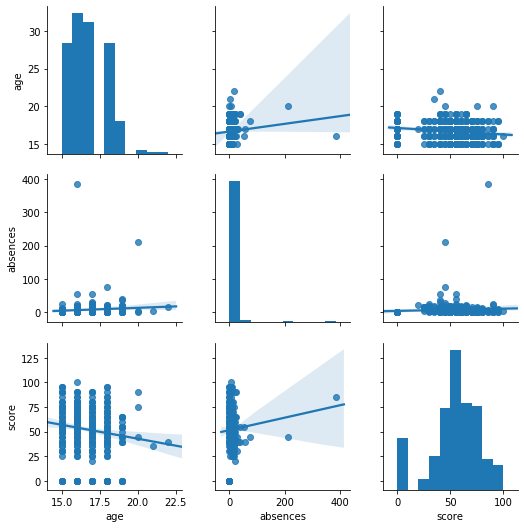

In [117]:
sns.pairplot(sm[['age', 'absences', 'score']], kind='reg')

In [116]:
sm.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


Слабая корреляция 'score' c 'absences', дает нам причину 'absences' для использования в дальнейшем для построения модели.
Корреляция с 'age', также небольшая, можем взять в дальнейшую работу.

***Сравивая с исходной информацией и принимая во внимание данные sm.info() и корреляцию, мы видим:***

- есть неверные (видимо опечатки) значения в столбцах 'dad_edu', 'family_relations' => корректируем
- нам неизвестны 5 итоговых оценок ('score') => удаляем строки (нет смысла исследовать без целевого параметра)
- в таблице неизвестный нам столбец 'studytime, granular' и он полностью коррелирует со столбцом 'studytime' => удаляем за ненадобностью (не несет новой информации)

***Преобразуем данные:***

In [78]:
sm.dad_edu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: dad_edu, dtype: int64

In [79]:
sm.family_relations.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: family_relations, dtype: int64

In [80]:
sm['dad_edu'].replace(40, 4, inplace=True)
# считаю что опечатка 0, а не 4, потому что 4 чаще встречается и вслучае ошибки это не так сильно повлияет на данные, как если наоборот.

sm['family_relations'].replace(-1, 1, inplace=True)

In [81]:
sm.dropna(subset=['score'], axis=0, how='any', inplace=True)

In [82]:
sm.drop(['studytime, granular'], axis='columns', inplace=True)

***Теперь определим сколько и в каких столбцах у нас имеются пропуски:***

In [83]:
sm.isnull().sum()

school               0
sex                  0
age                  0
address             15
family_size         27
parents_status      45
mom_edu              3
dad_edu             24
mom_job             19
dad_job             36
reason              17
guardian            31
traveltime          28
studytime            7
failures            22
school_support       9
family_support      38
paid_math           39
activities          14
nursery             15
higher              20
internet            34
romantic            31
family_relations    27
free_time            9
go_out               7
health              15
absences            11
score                0
dtype: int64

In [84]:
# Посмотрим в процентном соотношении сколько данных у нас не хватает
a = sm.isnull().sum()
b = a*100/394
b

school               0.000000
sex                  0.000000
age                  0.000000
address              3.807107
family_size          6.852792
parents_status      11.421320
mom_edu              0.761421
dad_edu              6.091371
mom_job              4.822335
dad_job              9.137056
reason               4.314721
guardian             7.868020
traveltime           7.106599
studytime            1.776650
failures             5.583756
school_support       2.284264
family_support       9.644670
paid_math            9.898477
activities           3.553299
nursery              3.807107
higher               5.076142
internet             8.629442
romantic             7.868020
family_relations     6.852792
free_time            2.284264
go_out               1.776650
health               3.807107
absences             2.791878
score                0.000000
dtype: float64

***Делаем вывод, что в целом не больше 10% данных пропущено, что не критично.***

***Избавимся от пропусков, чтобы не возникало проблем при работе алгоритмов:***
- заменим в данных типа float пропуски на медиану (количество пропусков по каждому столбцу меньше 10%, считаем, что это не ильно повлият на качество анализа)
- пропуски данных типа object заменим на значение 'No data'

In [86]:
sm.fillna(sm.mean(), inplace=True)
sm.fillna('No data', inplace=True)

In [87]:
sm.isnull().sum()

school              0
sex                 0
age                 0
address             0
family_size         0
parents_status      0
mom_edu             0
dad_edu             0
mom_job             0
dad_job             0
reason              0
guardian            0
traveltime          0
studytime           0
failures            0
school_support      0
family_support      0
paid_math           0
activities          0
nursery             0
higher              0
internet            0
romantic            0
family_relations    0
free_time           0
go_out              0
health              0
absences            0
score               0
dtype: int64

***У нас три столбца с числовыми типами данных ('age', 'absences', 'score').***
***Посмотрим как они себя ведут.***

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

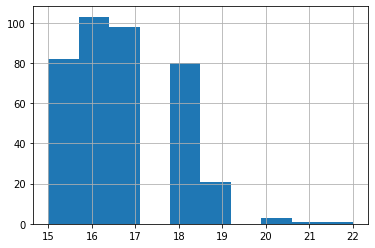

In [88]:
sm.age.hist()
sm.age.describe()

***Распределение показывается неравномерным, но мы знаем, что заданные параметры у нас входят в интервал на графике и по данным, поэтому выбросов нет, все данные оставляем.***

count    389.000000
mean       7.320106
std       23.278362
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

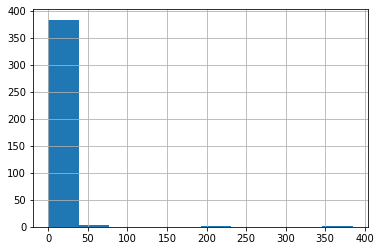

In [89]:
sm.absences.hist()
sm.absences.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


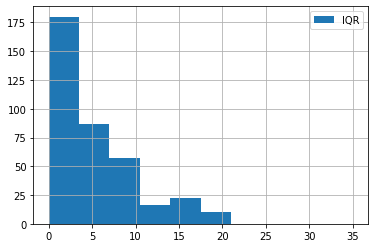

In [90]:
median = sm.absences.median()
IQR = sm.absences.quantile(0.75) - sm.absences.quantile(0.25)
perc25 = sm.absences.quantile(0.25)
perc75 = sm.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
sm.absences.loc[sm.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10, range=(0, 35), label='IQR')
plt.legend()

***Теперь видим, что график без пропусков, заметна тенденция, что у большего количества учащихся меньше пропусков.***

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

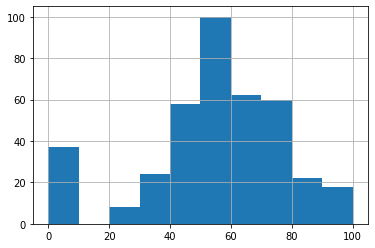

In [23]:
sm.score.hist()
sm.score.describe()

***По графику распределения целевой параметр "Баллы по госэкзамену по математике" распределены нормально, все данные в пределах заданного интервала, выбросов нет. 
Но наблюдается большое кол-во данных с результатом "0".
Возможно эту оценку стоит рассматривать отдельно и на нее повлияли факторы другим образом, а также она значит, что учащиеся, получившие "0" не присутствовали на экзамене или не дали ни одного правильного ответа, либо что-то еще им могло помешать.***

Остальные данные у нас категориальные переменные, потому построим по ним boxplot-ы по целевому признаку, а далее применим тест Стьюдента для определения самых важных параметров.

In [97]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x=column, y='score',
                data=sm.loc[sm.loc[:, column].isin(
                    sm.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

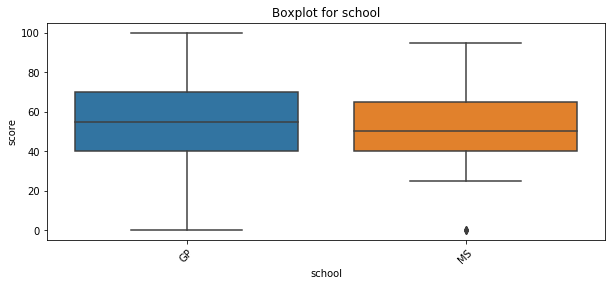

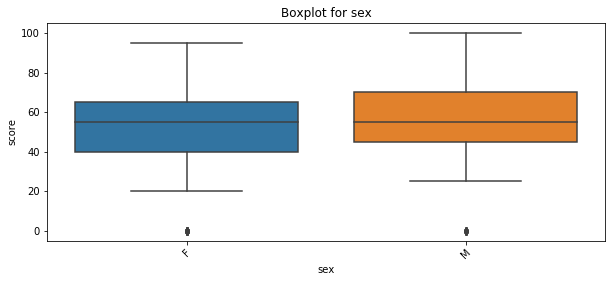

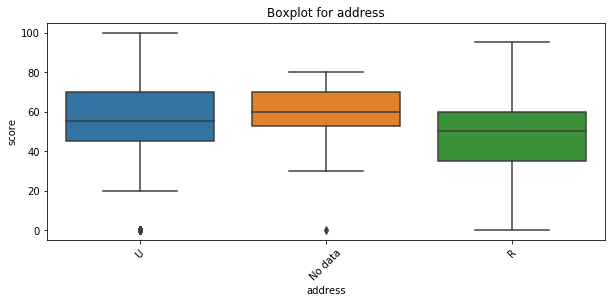

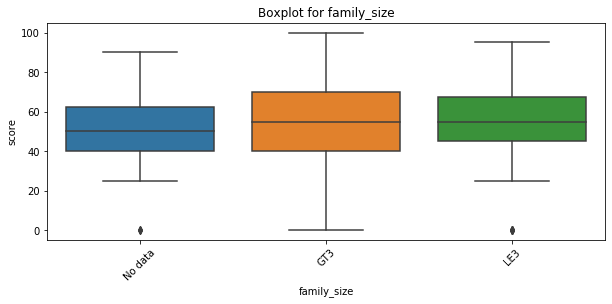

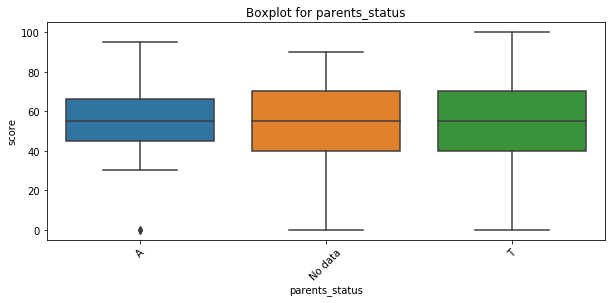

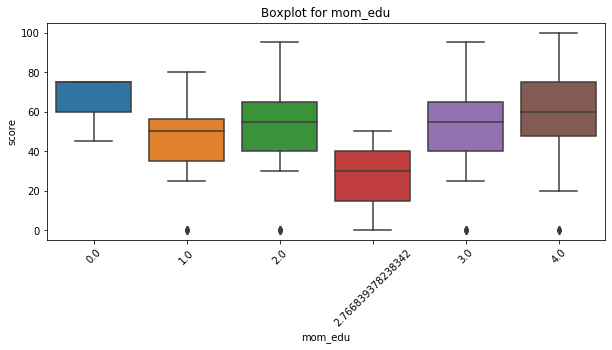

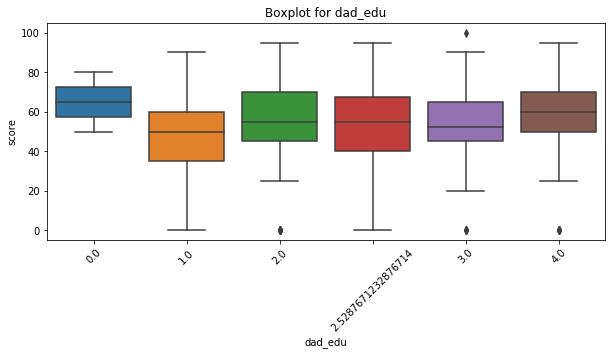

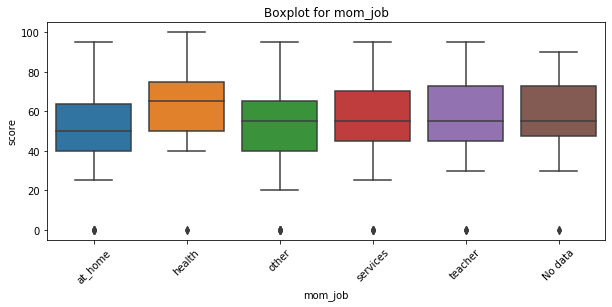

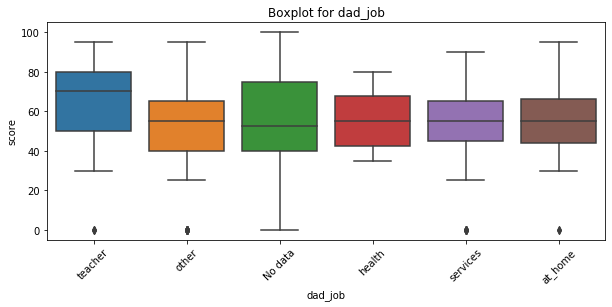

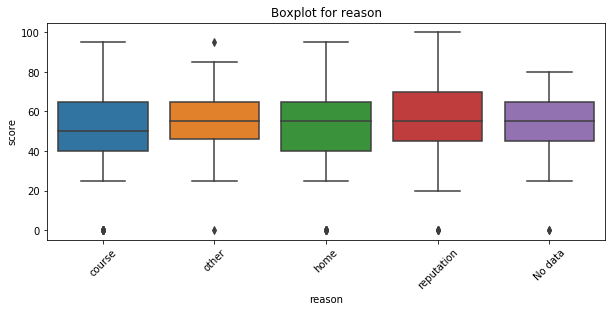

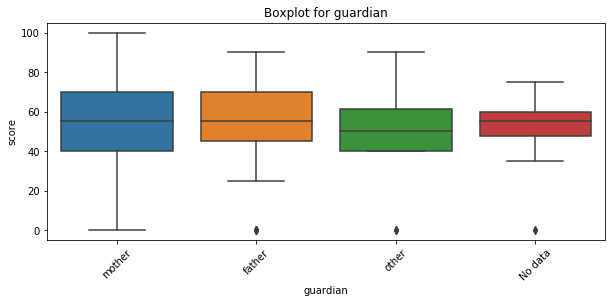

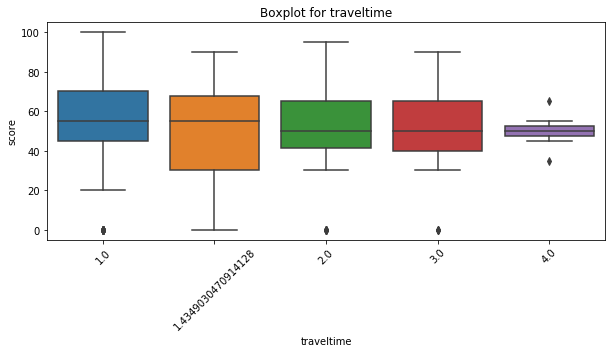

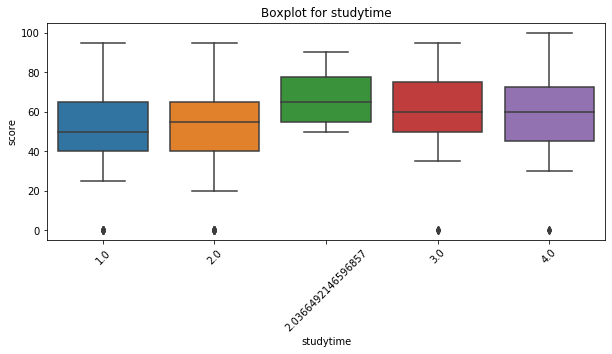

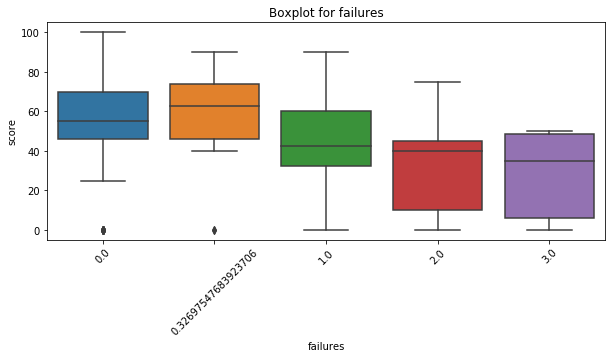

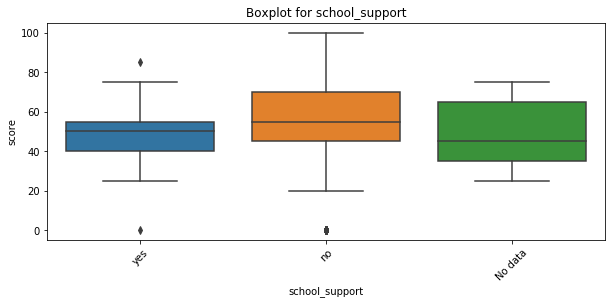

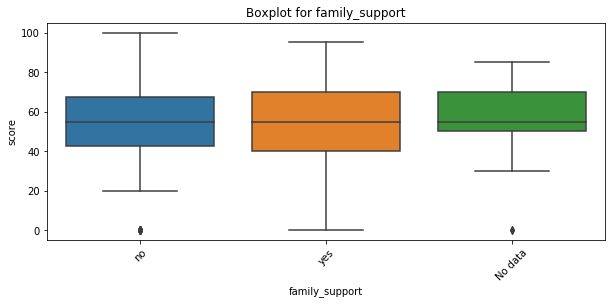

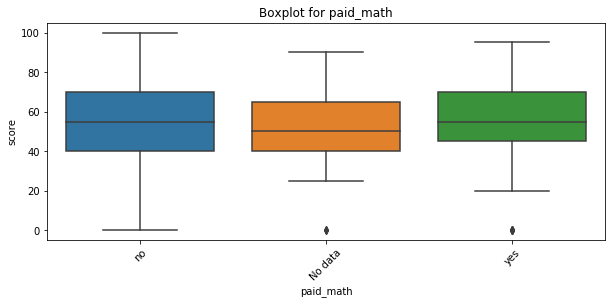

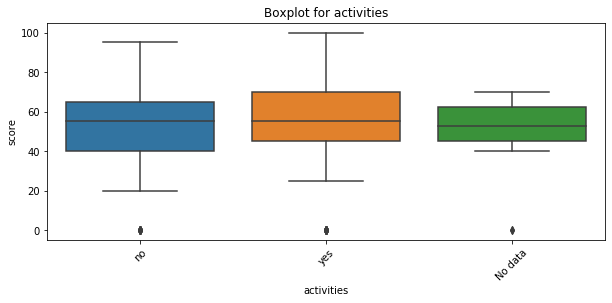

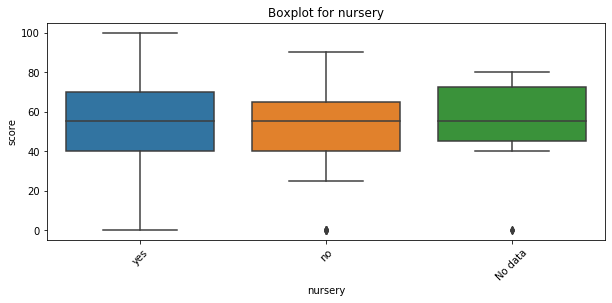

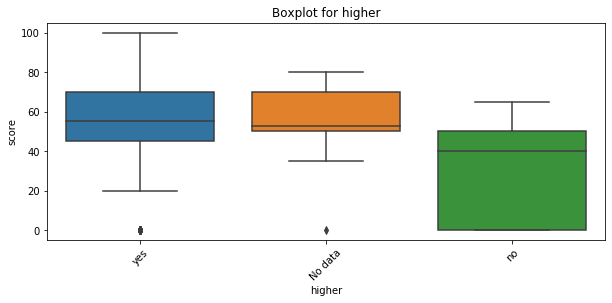

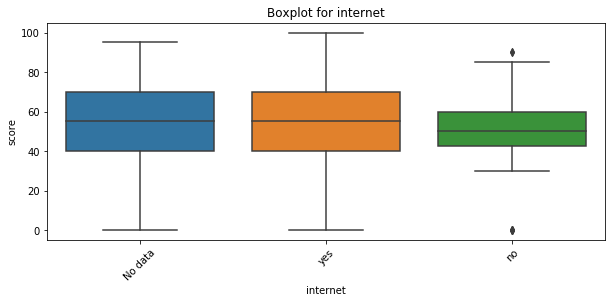

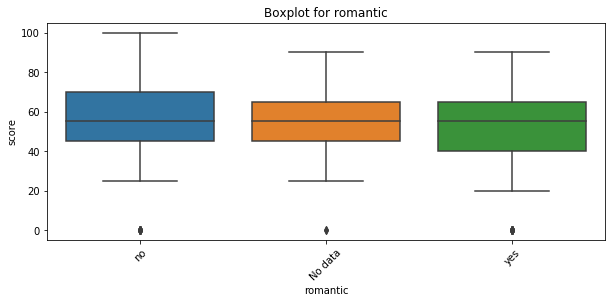

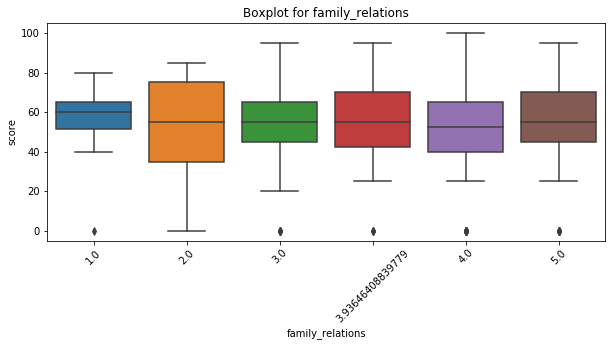

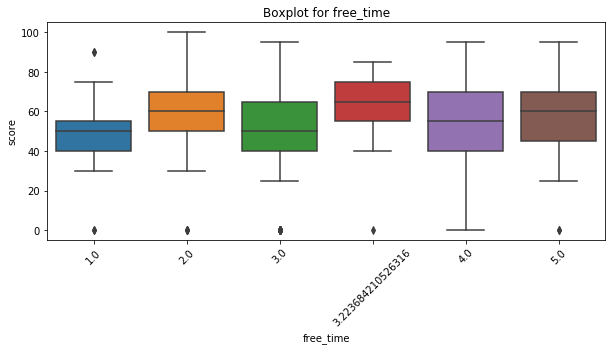

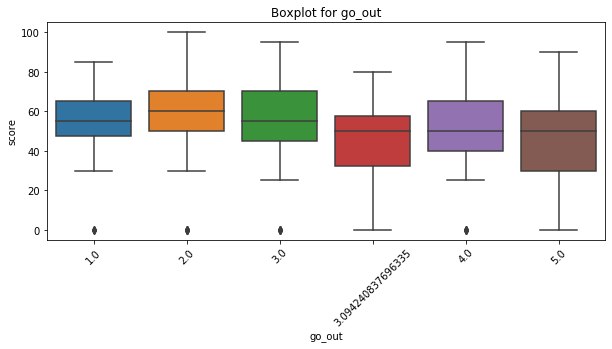

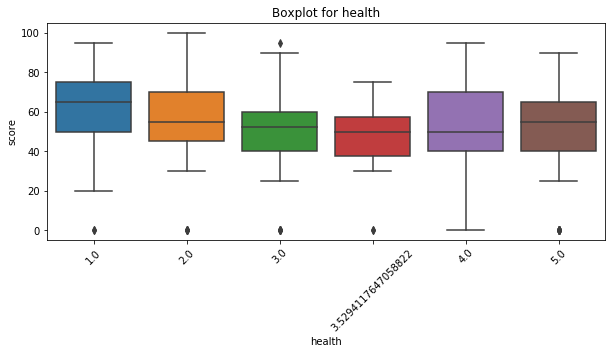

In [98]:
for col in ['school', 'sex', 'address', 'family_size', 'parents_status',
            'mom_edu', 'dad_edu', 'mom_job', 'dad_job', 'reason', 'guardian',
            'traveltime', 'studytime', 'failures', 'school_support',
            'family_support', 'paid_math', 'activities', 'nursery', 'higher', 'internet', 'romantic',
            'family_relations', 'free_time', 'go_out', 'health']:
    get_boxplot(col)

***По диаграммам мы видим, что наиболее влияют на целевой показатель, показатели 'mom_edu', 'dad_edu', 'studytime', 'failures', 'higher', 'free_time', 'health'.
Но точнее значимость различий поможет определить тест Стьюдента:***

In [99]:
def get_stat_dif(column):
    cols = sm.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(sm.loc[sm.loc[:, column] == comb[0], 'score'],
                     sm.loc[sm.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [100]:
for col in ['school', 'sex', 'address', 'family_size', 'parents_status',
            'mom_edu', 'dad_edu', 'mom_job', 'dad_job', 'reason', 'guardian',
            'traveltime', 'studytime', 'failures', 'school_support',
            'family_support', 'paid_math', 'activities', 'nursery', 'higher', 'internet', 'romantic',
            'family_relations', 'free_time', 'go_out', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки mom_edu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


# Итоги:

1. В данных не более 10% процентов пропусков (кроме одного показателя, там 11%), потому будем считать данные достаточно полными. По типам данных float пустые значения были заменены на медиану, а object - на отдельную позицию 'No data'.

2. В количественных данных выбросы есть только в 'absence'.

3. Стоит исследовать причину большого кол-ва 'score' = 0, возможны отдельные причины, повлившие на неявку или неуд.

5. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это 'mom_edu', 'failures', 'higher', 'romantic', ф также 'age' и 'absences'.